<a href="https://colab.research.google.com/github/Loelama36/Project_1_Computing_Errors/blob/main/GroupProject_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Module 7: Integration**


<strong>Sunil Lama<br>
Jacob Mantooth<br>
Puran Subedi<br>
Riwaz Gyawali<br>
Instructor: Dr. Nicholas Jacob<br>
Numerical Analysis
<strong># Project Module 7: Integration

# Part 1: Riemann Integration

## Part 1a: Using your original Project Part 1 function, f. Pick an interval and find the signed area under the curve. Graph and find the area using methods from calculus.

In [41]:
import numpy as np
import scipy
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


Our original function is $f(x) = \cos x$. we will be investigating the the first hump and its area,
$$
A = \int_{0}^{\frac\pi2} \cos x\ dx
$$

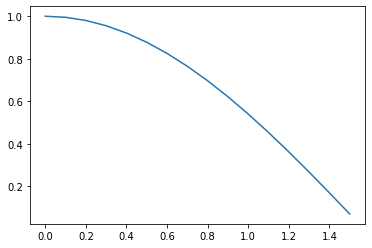

In [42]:
x = np.arange( 0,np.pi/2,.1)
plt.plot(x,np.cos(x))

Lets do it by hand!

$$
\begin{align}
A &= \int_{0}^{\frac\pi2} \cos x \ dx\\
&= \sin x\vert_0^{\frac\pi2}\\
&= \sin\frac\pi2-\sin 0\\
&= 1
\end{align}
$$

## Part 1b: Use builtin integration to check your answer

In [43]:
scipy.integrate.quad(np.cos,0,np.pi/2)

(0.9999999999999999, 1.1102230246251564e-14)

## Part 1c: Program an algorithm to compute the Riemann sum of your function over the interval.

The three different Riemann Sums are, a left, center and right.  you compute the area under the curve by creating $n$  rectangles of equal width, $\Delta x = \frac{b-a}n$, computing the height using the function of interest chosing the point consistently.

$$
A\approx \sum_{i=1}^n f(a+i\Delta x)\Delta x
$$

In [44]:
def deltax(a,b,n):
  return (b-a)/n

def riemannSum(f,a,b,n,indicator = ''):
  dx = deltax(a,b,n)
  if indicator == 'r':
    start = 1
  elif indicator == 'l':
    start = 0
  elif indicator == 'mid':
    start = 0.5
  sum = 0
  for j in np.arange(start,n+start):
    sum = sum + f(a + j*dx)*dx
  return sum


In [45]:
riemannSum(np.cos, 0,np.pi/2,20,'r')

0.9602159970786602

In [46]:
riemannSum(np.cos, 0,np.pi/2,20,'l')

1.0387558134184054

In [47]:
riemannSum(np.cos, 0,np.pi/2,20,'mid')

1.000257067197303

In [48]:
import plotly.graph_objects as go
squares= [i for i in range(1,11)]
left= [riemannSum(np.cos, 0,np.pi/2,i,'l') for i in squares]
right= [riemannSum(np.cos, 0,np.pi/2,i,'r') for i in squares]
mid= [riemannSum(np.cos, 0,np.pi/2,i,'mid') for i in squares]
real_value = [1 for i in squares]
errorl = [(riemannSum(np.cos, 0,np.pi/2,i,'l') - 1)/1 *100 for i in squares]
errorr = [(riemannSum(np.cos, 0,np.pi/2,i,'r') - 1)/1 *100 for i in squares]
errormid = [(riemannSum(np.cos, 0,np.pi/2,i,'mid') - 1)/1 *100for i in squares]
fig = go.Figure(data=[go.Table(
                header=dict(values=['Squares','Real Value','Left','Percent Error of Left','Right','Percent Error of Right','Mid','Percent Error of Mid']),
                cells=dict(values =[squares,real_value,left,errorl,right,errorr,mid,errormid]))
                     ])
fig.show()

# Part 2:Other Numerical Integration

## Part2a: Create an algorithm for computing either the trapezoid 

The trapazoid rule states that
$$
\int_a^b f(x)\ dx\approx \frac{\Delta x}{2}
\left[
f(a) 
+
2\left(
\sum_{i=1}^{n-1} f(a+i\Delta x)
  \right)
  +
  f(b)
  \right]
$$

In [49]:
def trap (f, a, b, intervals):
  dx = deltax(a,b,intervals)
  sum = 0
  for i in range(1,intervals):
    sum = sum + 2*f(a+i*dx)
  for i in [a,b]:
    sum = sum +f(i)
  sum = dx/2 *sum
  return sum

trap(np.cos, 0 , np.pi/2, 20)


0.999485905248533

## Part2b: Compute errors on your function f and compare to your other estimates

In [50]:
intervals = [i for i in range(1,11)]

errortrap = [(trap(np.cos, 0 , np.pi/2, i)-1)/1*100 for i in intervals]
errorl = [(riemannSum(np.cos, 0,np.pi/2,i,'l') - 1)/1*100 for i in intervals]
errorr = [(riemannSum(np.cos, 0,np.pi/2,i,'r') - 1)/1*100 for i in intervals]
errormid = [(riemannSum(np.cos, 0,np.pi/2,i,'mid') - 1)/1*100 for i in intervals]
fig = go.Figure(data=[go.Table(
                header=dict(values=['Intervals','Real Value','Percent Error of Left','Percent Error of Right','Percent Error of Mid', 'Percent Error of Trap']),
                cells=dict(values =[intervals,real_value,errorl,errorr,errormid, errortrap]))
                     ])
fig.show()

**Part 3**

a)

First of all in this project we have used the function from project 1 which is cosx .Then we used integration to find its area over 0 and pi/2.After we are done with the step we get its area. Second step we used is to find the builtin integration to check the area that we have calculated.After these steps we move onto the Riemann sum. Using the algorithm we compute the Riemann sum of the function cosx. Here, we need to find the left, mid and right sum. In order to calculate the riemann sum we define the deltax and also riemannsum function. Here, we use if and elif statement and compute the sum left right and mid respectively. The final step is the algorithm for computing the trapeziod. We define the trap function and then with the help of for loop we compute the trapezoid.Finally, we check for the error on our function and other estimate.

b)

When we compare the actual values to the left Riemann sum, right Riemann sum and mid point Riemann sum. We make a table obtain from our calculation. From the table what we can conclude is that left Riemann sum is over estimated, right Riemann sum is under estimated and mid point Riemann sum's value is close to actual value. 

c)

If we are given the strictly increasing function then the better option would be to work with Trapezoidal rule. The result using Trapezoidal rule would be more accurate than other method in strictly increasing function. Even for the decreasing function, the best option would be use Trapezoidal rule. And for the undulating graphs, we think that Simpson's rule would be better to use. We have found several cases where Simpson's rule has been used to solve the undulating graphs. 